## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\Bobson\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [15]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [9]:
LEARNING_RATE = 1e-3
EPOCHS = 30 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024


In [10]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.25,0.5,0.75]
redice_lr_patient = [3,5,8,10]

In [16]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = keras.callbacks.ReduceLROnPlateau(min_lr = 1e-12, factor = reduce_factor, verbose = 1, patience = reduce_patient, monitor='val_loss')
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.25, reduce_patient: 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizatio

50000/50000 [==============================] - 5s 93us/step - loss: 1.6357 - acc: 0.4277 - val_loss: 1.7169 - val_acc: 0.4021
Epoch 9/30
50000/50000 [==============================] - 5s 97us/step - loss: 1.6086 - acc: 0.4364 - val_loss: 1.6944 - val_acc: 0.4127
Epoch 10/30
50000/50000 [==============================] - 5s 101us/step - loss: 1.5854 - acc: 0.4435 - val_loss: 1.6799 - val_acc: 0.4175
Epoch 11/30
50000/50000 [==============================] - 5s 94us/step - loss: 1.5650 - acc: 0.4507 - val_loss: 1.6642 - val_acc: 0.4208
Epoch 12/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.5442 - acc: 0.4576 - val_loss: 1.6491 - val_acc: 0.4271
Epoch 13/30
50000/50000 [==============================] - 5s 92us/step - loss: 1.5261 - acc: 0.4660 - val_loss: 1.6384 - val_acc: 0.4273
Epoch 14/30
50000/50000 [==============================] - 5s 95us/step - loss: 1.5095 - acc: 0.4711 - val_loss: 1.6247 - val_acc: 0.4342
Epoch 15/30
50000/50000 [=====================

50000/50000 [==============================] - 6s 110us/step - loss: 1.3562 - acc: 0.5304 - val_loss: 1.5550 - val_acc: 0.4544
Epoch 27/30
50000/50000 [==============================] - 5s 94us/step - loss: 1.3463 - acc: 0.5330 - val_loss: 1.5523 - val_acc: 0.4551
Epoch 28/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.3371 - acc: 0.5371 - val_loss: 1.5488 - val_acc: 0.4580
Epoch 29/30
50000/50000 [==============================] - 5s 92us/step - loss: 1.3283 - acc: 0.5394 - val_loss: 1.5450 - val_acc: 0.4568
Epoch 30/30
50000/50000 [==============================] - 5s 92us/step - loss: 1.3202 - acc: 0.5416 - val_loss: 1.5400 - val_acc: 0.4581
Numbers of exp: 3, reduce_factor: 0.25, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
________________________________________________________________

Epoch 4/30
50000/50000 [==============================] - 5s 92us/step - loss: 1.8056 - acc: 0.3724 - val_loss: 1.8459 - val_acc: 0.3619
Epoch 5/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.7467 - acc: 0.3910 - val_loss: 1.8074 - val_acc: 0.3723
Epoch 6/30
50000/50000 [==============================] - 5s 92us/step - loss: 1.7014 - acc: 0.4049 - val_loss: 1.7691 - val_acc: 0.3863
Epoch 7/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.6648 - acc: 0.4176 - val_loss: 1.7476 - val_acc: 0.3883
Epoch 8/30
50000/50000 [==============================] - 5s 92us/step - loss: 1.6324 - acc: 0.4273 - val_loss: 1.7158 - val_acc: 0.4002
Epoch 9/30
50000/50000 [==============================] - 5s 92us/step - loss: 1.6056 - acc: 0.4374 - val_loss: 1.6889 - val_acc: 0.4118
Epoch 10/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.5807 - acc: 0.4467 - val_loss: 1.6752 - val_acc: 0.4132
Epoch 11/30
50000/50000 [===============

50000/50000 [==============================] - 5s 94us/step - loss: 1.4095 - acc: 0.5070 - val_loss: 1.5810 - val_acc: 0.4419
Epoch 23/30
50000/50000 [==============================] - 5s 92us/step - loss: 1.3989 - acc: 0.5128 - val_loss: 1.5776 - val_acc: 0.4463
Epoch 24/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.3883 - acc: 0.5152 - val_loss: 1.5739 - val_acc: 0.4465
Epoch 25/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.3773 - acc: 0.5202 - val_loss: 1.5698 - val_acc: 0.4510
Epoch 26/30
50000/50000 [==============================] - 5s 92us/step - loss: 1.3686 - acc: 0.5222 - val_loss: 1.5626 - val_acc: 0.4485
Epoch 27/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.3583 - acc: 0.5265 - val_loss: 1.5614 - val_acc: 0.4522
Epoch 28/30
50000/50000 [==============================] - 5s 92us/step - loss: 1.3488 - acc: 0.5307 - val_loss: 1.5566 - val_acc: 0.4517
Epoch 29/30
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s 110us/step - loss: 2.5198 - acc: 0.2007 - val_loss: 2.4264 - val_acc: 0.2620
Epoch 2/30
50000/50000 [==============================] - 5s 93us/step - loss: 2.0385 - acc: 0.3151 - val_loss: 2.1056 - val_acc: 0.3114
Epoch 3/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.8809 - acc: 0.3566 - val_loss: 1.9376 - val_acc: 0.3518
Epoch 4/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.7927 - acc: 0.3789 - val_loss: 1.8533 - val_acc: 0.3707
Epoch 5/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.7334 - acc: 0.4005 - val_loss: 1.8059 - val_acc: 0.3837
Epoch 6/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.6872 - acc: 0.4128 - val_loss: 1.7584 - val_acc: 0.3938
Epoch 7/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.6506 - acc: 0.4253 - val_loss: 1.7308 - val_ac

50000/50000 [==============================] - 5s 94us/step - loss: 1.4414 - acc: 0.4963 - val_loss: 1.5931 - val_acc: 0.4422
Epoch 20/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.4294 - acc: 0.5014 - val_loss: 1.5841 - val_acc: 0.4450
Epoch 21/30
50000/50000 [==============================] - 5s 94us/step - loss: 1.4166 - acc: 0.5049 - val_loss: 1.5819 - val_acc: 0.4463
Epoch 22/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.4063 - acc: 0.5102 - val_loss: 1.5732 - val_acc: 0.4499
Epoch 23/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.3951 - acc: 0.5134 - val_loss: 1.5687 - val_acc: 0.4495
Epoch 24/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.3844 - acc: 0.5172 - val_loss: 1.5616 - val_acc: 0.4530
Epoch 25/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.3740 - acc: 0.5202 - val_loss: 1.5562 - val_acc: 0.4556
Epoch 26/30
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 6s 116us/step - loss: 2.5502 - acc: 0.1888 - val_loss: 2.3899 - val_acc: 0.2443
Epoch 2/30
50000/50000 [==============================] - 5s 95us/step - loss: 2.0378 - acc: 0.3086 - val_loss: 2.0370 - val_acc: 0.3132
Epoch 3/30
50000/50000 [==============================] - 5s 95us/step - loss: 1.8852 - acc: 0.3505 - val_loss: 1.9221 - val_acc: 0.3415
Epoch 4/30
50000/50000 [==============================] - 5s 94us/step - loss: 1.8030 - acc: 0.3753 - val_loss: 1.8452 - val_acc: 0.3640
Epoch 5/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.7460 - acc: 0.3928 - val_loss: 1.8004 - val_acc: 0.3775
Epoch 6/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.7009 - acc: 0.4069 - val_loss: 1.7699 - val_acc: 0.3853
Epoch 7/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.6671 - acc: 0.4179 - val_loss: 1.7375 - val_ac

50000/50000 [==============================] - 5s 93us/step - loss: 1.4446 - acc: 0.4973 - val_loss: 1.6061 - val_acc: 0.4401
Epoch 20/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.4327 - acc: 0.5014 - val_loss: 1.5970 - val_acc: 0.4417
Epoch 21/30
50000/50000 [==============================] - 5s 92us/step - loss: 1.4206 - acc: 0.5048 - val_loss: 1.5904 - val_acc: 0.4448
Epoch 22/30
50000/50000 [==============================] - 5s 93us/step - loss: 1.4101 - acc: 0.5105 - val_loss: 1.5848 - val_acc: 0.4418
Epoch 23/30
50000/50000 [==============================] - 5s 92us/step - loss: 1.3990 - acc: 0.5145 - val_loss: 1.5820 - val_acc: 0.4494
Epoch 24/30
50000/50000 [==============================] - 5s 92us/step - loss: 1.3889 - acc: 0.5171 - val_loss: 1.5758 - val_acc: 0.4490
Epoch 25/30
50000/50000 [==============================] - 5s 92us/step - loss: 1.3794 - acc: 0.5216 - val_loss: 1.5694 - val_acc: 0.4484
Epoch 26/30
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 6s 127us/step - loss: 3.0536 - acc: 0.0948 - val_loss: 2.9469 - val_acc: 0.1064
Epoch 2/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.9591 - acc: 0.1062 - val_loss: 2.8816 - val_acc: 0.1169
Epoch 3/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.8984 - acc: 0.1145 - val_loss: 2.8347 - val_acc: 0.1289
Epoch 4/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.8542 - acc: 0.1232 - val_loss: 2.7989 - val_acc: 0.1352
Epoch 5/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.8184 - acc: 0.1287 - val_loss: 2.7678 - val_acc: 0.1414
Epoch 6/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.7881 - acc: 0.1353 - val_loss: 2.7414 - val_acc: 0.1473
Epoch 7/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.7599 - acc: 0.1413 - val_loss: 2.7173 - val_ac

50000/50000 [==============================] - 5s 97us/step - loss: 2.4519 - acc: 0.1996 - val_loss: 2.4593 - val_acc: 0.1994
Epoch 20/30
50000/50000 [==============================] - 5s 96us/step - loss: 2.4407 - acc: 0.2022 - val_loss: 2.4493 - val_acc: 0.2024
Epoch 21/30
50000/50000 [==============================] - 5s 96us/step - loss: 2.4298 - acc: 0.2053 - val_loss: 2.4400 - val_acc: 0.2044
Epoch 22/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.4198 - acc: 0.2077 - val_loss: 2.4309 - val_acc: 0.2053
Epoch 23/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.4098 - acc: 0.2087 - val_loss: 2.4223 - val_acc: 0.2071
Epoch 24/30
50000/50000 [==============================] - 5s 96us/step - loss: 2.4008 - acc: 0.2122 - val_loss: 2.4136 - val_acc: 0.2084
Epoch 25/30
50000/50000 [==============================] - 5s 96us/step - loss: 2.3924 - acc: 0.2125 - val_loss: 2.4055 - val_acc: 0.2104
Epoch 26/30
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 6s 129us/step - loss: 2.9540 - acc: 0.1182 - val_loss: 2.8932 - val_acc: 0.1229
Epoch 2/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.8391 - acc: 0.1339 - val_loss: 2.8176 - val_acc: 0.1367
Epoch 3/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.7705 - acc: 0.1437 - val_loss: 2.7637 - val_acc: 0.1446
Epoch 4/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.7187 - acc: 0.1523 - val_loss: 2.7205 - val_acc: 0.1511
Epoch 5/30
50000/50000 [==============================] - 5s 96us/step - loss: 2.6791 - acc: 0.1598 - val_loss: 2.6846 - val_acc: 0.1576
Epoch 6/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.6449 - acc: 0.1656 - val_loss: 2.6541 - val_acc: 0.1648
Epoch 7/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.6166 - acc: 0.1718 - val_loss: 2.6273 - val_ac

Epoch 19/30
50000/50000 [==============================] - 19s 386us/step - loss: 2.4555 - acc: 0.1972 - val_loss: 2.4375 - val_acc: 0.2027
Epoch 20/30
50000/50000 [==============================] - 24s 470us/step - loss: 2.4444 - acc: 0.1993 - val_loss: 2.4276 - val_acc: 0.2066
Epoch 21/30
50000/50000 [==============================] - 20s 396us/step - loss: 2.4337 - acc: 0.2008 - val_loss: 2.4177 - val_acc: 0.2097
Epoch 22/30
50000/50000 [==============================] - 20s 408us/step - loss: 2.4238 - acc: 0.2037 - val_loss: 2.4084 - val_acc: 0.2118
Epoch 23/30
50000/50000 [==============================] - 18s 365us/step - loss: 2.4144 - acc: 0.2065 - val_loss: 2.3992 - val_acc: 0.2142
Epoch 24/30
50000/50000 [==============================] - 19s 370us/step - loss: 2.4053 - acc: 0.2081 - val_loss: 2.3909 - val_acc: 0.2160
Epoch 25/30
50000/50000 [==============================] - 16s 324us/step - loss: 2.3961 - acc: 0.2096 - val_loss: 2.3829 - val_acc: 0.2166
Epoch 26/30
50000/50

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 7s 136us/step - loss: 2.9118 - acc: 0.1129 - val_loss: 2.8305 - val_acc: 0.1205
Epoch 2/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.8084 - acc: 0.1279 - val_loss: 2.7598 - val_acc: 0.1373
Epoch 3/30
50000/50000 [==============================] - 5s 99us/step - loss: 2.7461 - acc: 0.1396 - val_loss: 2.7117 - val_acc: 0.1477
Epoch 4/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.6998 - acc: 0.1489 - val_loss: 2.6738 - val_acc: 0.1549
Epoch 5/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.6637 - acc: 0.1557 - val_loss: 2.6426 - val_acc: 0.1609
Epoch 6/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.6337 - acc: 0.1613 - val_loss: 2.6162 - val_acc: 0.1675
Epoch 7/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.6089 - acc: 0.1674 - val_loss: 2.5928 - val_ac

50000/50000 [==============================] - 5s 97us/step - loss: 2.4684 - acc: 0.2071 - val_loss: 2.4810 - val_acc: 0.2090
Epoch 20/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.4556 - acc: 0.2100 - val_loss: 2.4703 - val_acc: 0.2111
Epoch 21/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.4453 - acc: 0.2123 - val_loss: 2.4599 - val_acc: 0.2134
Epoch 22/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.4362 - acc: 0.2146 - val_loss: 2.4499 - val_acc: 0.2166
Epoch 23/30
50000/50000 [==============================] - 5s 99us/step - loss: 2.4262 - acc: 0.2162 - val_loss: 2.4405 - val_acc: 0.2179
Epoch 24/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.4156 - acc: 0.2186 - val_loss: 2.4313 - val_acc: 0.2192
Epoch 25/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.4072 - acc: 0.2201 - val_loss: 2.4223 - val_acc: 0.2209
Epoch 26/30
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 7s 142us/step - loss: 2.9405 - acc: 0.1116 - val_loss: 2.8312 - val_acc: 0.1313
Epoch 2/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.8412 - acc: 0.1243 - val_loss: 2.7603 - val_acc: 0.1445
Epoch 3/30
50000/50000 [==============================] - 5s 99us/step - loss: 2.7790 - acc: 0.1353 - val_loss: 2.7125 - val_acc: 0.1508
Epoch 4/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.7345 - acc: 0.1436 - val_loss: 2.6744 - val_acc: 0.1579
Epoch 5/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.6963 - acc: 0.1510 - val_loss: 2.6417 - val_acc: 0.1645
Epoch 6/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.6646 - acc: 0.1581 - val_loss: 2.6142 - val_acc: 0.1694
Epoch 7/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.6397 - acc: 0.1634 - val_loss: 2.5901 - val_ac

50000/50000 [==============================] - 5s 97us/step - loss: 2.4803 - acc: 0.1961 - val_loss: 2.4770 - val_acc: 0.1973
Epoch 20/30
50000/50000 [==============================] - 5s 99us/step - loss: 2.4690 - acc: 0.1978 - val_loss: 2.4670 - val_acc: 0.1996
Epoch 21/30
50000/50000 [==============================] - 5s 100us/step - loss: 2.4602 - acc: 0.2003 - val_loss: 2.4577 - val_acc: 0.2014
Epoch 22/30
50000/50000 [==============================] - 5s 106us/step - loss: 2.4480 - acc: 0.2026 - val_loss: 2.4489 - val_acc: 0.2036
Epoch 23/30
50000/50000 [==============================] - 5s 99us/step - loss: 2.4389 - acc: 0.2047 - val_loss: 2.4403 - val_acc: 0.2052
Epoch 24/30
50000/50000 [==============================] - 5s 101us/step - loss: 2.4289 - acc: 0.2082 - val_loss: 2.4318 - val_acc: 0.2076
Epoch 25/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.4213 - acc: 0.2091 - val_loss: 2.4233 - val_acc: 0.2105
Epoch 26/30
50000/50000 [==================

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 8s 160us/step - loss: 2.8384 - acc: 0.1334 - val_loss: 2.7986 - val_acc: 0.1440
Epoch 2/30
50000/50000 [==============================] - 5s 100us/step - loss: 2.8168 - acc: 0.1357 - val_loss: 2.7767 - val_acc: 0.1466
Epoch 3/30
50000/50000 [==============================] - 5s 99us/step - loss: 2.7975 - acc: 0.1396 - val_loss: 2.7564 - val_acc: 0.1490
Epoch 4/30
50000/50000 [==============================] - 5s 103us/step - loss: 2.7783 - acc: 0.1423 - val_loss: 2.7365 - val_acc: 0.1527
Epoch 5/30
50000/50000 [==============================] - 5s 103us/step - loss: 2.7596 - acc: 0.1455 - val_loss: 2.7174 - val_acc: 0.1564
Epoch 6/30
50000/50000 [==============================] - 5s 102us/step - loss: 2.7406 - acc: 0.1477 - val_loss: 2.6993 - val_acc: 0.1599
Epoch 7/30
50000/50000 [==============================] - 5s 107us/step - loss: 2.7231 - acc: 0.1507 - val_loss: 2.6820 - v

50000/50000 [==============================] - 5s 103us/step - loss: 2.6817 - acc: 0.1608 - val_loss: 2.7020 - val_acc: 0.1593
Epoch 20/30
50000/50000 [==============================] - 5s 103us/step - loss: 2.6676 - acc: 0.1630 - val_loss: 2.6890 - val_acc: 0.1622
Epoch 21/30
50000/50000 [==============================] - 5s 99us/step - loss: 2.6544 - acc: 0.1672 - val_loss: 2.6763 - val_acc: 0.1652
Epoch 22/30
50000/50000 [==============================] - 5s 105us/step - loss: 2.6426 - acc: 0.1679 - val_loss: 2.6640 - val_acc: 0.1682
Epoch 23/30
50000/50000 [==============================] - 5s 105us/step - loss: 2.6297 - acc: 0.1705 - val_loss: 2.6520 - val_acc: 0.1707
Epoch 24/30
50000/50000 [==============================] - 5s 102us/step - loss: 2.6173 - acc: 0.1733 - val_loss: 2.6402 - val_acc: 0.1729
Epoch 25/30
50000/50000 [==============================] - 5s 104us/step - loss: 2.6058 - acc: 0.1757 - val_loss: 2.6285 - val_acc: 0.1752
Epoch 26/30
50000/50000 [===============

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 7s 150us/step - loss: 2.9712 - acc: 0.1164 - val_loss: 2.9619 - val_acc: 0.1166
Epoch 2/30
50000/50000 [==============================] - 5s 99us/step - loss: 2.9482 - acc: 0.1201 - val_loss: 2.9383 - val_acc: 0.1191
Epoch 3/30
50000/50000 [==============================] - 5s 99us/step - loss: 2.9246 - acc: 0.1224 - val_loss: 2.9158 - val_acc: 0.1215
Epoch 4/30
50000/50000 [==============================] - 5s 100us/step - loss: 2.9022 - acc: 0.1256 - val_loss: 2.8941 - val_acc: 0.1264
Epoch 5/30
50000/50000 [==============================] - 5s 99us/step - loss: 2.8809 - acc: 0.1283 - val_loss: 2.8737 - val_acc: 0.1289
Epoch 6/30
50000/50000 [==============================] - 5s 100us/step - loss: 2.8619 - acc: 0.1309 - val_loss: 2.8537 - val_acc: 0.1318
Epoch 7/30
50000/50000 [==============================] - 5s 99us/step - loss: 2.8410 - acc: 0.1339 - val_loss: 2.8339 - val_

50000/50000 [==============================] - 5s 98us/step - loss: 2.6635 - acc: 0.1626 - val_loss: 2.6364 - val_acc: 0.1647
Epoch 20/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.6512 - acc: 0.1646 - val_loss: 2.6237 - val_acc: 0.1671
Epoch 21/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.6377 - acc: 0.1681 - val_loss: 2.6119 - val_acc: 0.1709
Epoch 22/30
50000/50000 [==============================] - 5s 100us/step - loss: 2.6251 - acc: 0.1697 - val_loss: 2.6001 - val_acc: 0.1735
Epoch 23/30
50000/50000 [==============================] - 5s 99us/step - loss: 2.6129 - acc: 0.1732 - val_loss: 2.5887 - val_acc: 0.1765
Epoch 24/30
50000/50000 [==============================] - 5s 100us/step - loss: 2.6002 - acc: 0.1752 - val_loss: 2.5773 - val_acc: 0.1787
Epoch 25/30
50000/50000 [==============================] - 5s 100us/step - loss: 2.5896 - acc: 0.1761 - val_loss: 2.5663 - val_acc: 0.1806
Epoch 26/30
50000/50000 [==================

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 8s 153us/step - loss: 2.8790 - acc: 0.1223 - val_loss: 2.8673 - val_acc: 0.1191
Epoch 2/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.8556 - acc: 0.1240 - val_loss: 2.8427 - val_acc: 0.1236
Epoch 3/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.8368 - acc: 0.1277 - val_loss: 2.8206 - val_acc: 0.1272
Epoch 4/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.8165 - acc: 0.1321 - val_loss: 2.8006 - val_acc: 0.1310
Epoch 5/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.7964 - acc: 0.1356 - val_loss: 2.7815 - val_acc: 0.1328
Epoch 6/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.7768 - acc: 0.1377 - val_loss: 2.7634 - val_acc: 0.1371
Epoch 7/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.7577 - acc: 0.1424 - val_loss: 2.7467 - val_ac

50000/50000 [==============================] - 5s 101us/step - loss: 2.5938 - acc: 0.1774 - val_loss: 2.5768 - val_acc: 0.1813
Epoch 20/30
50000/50000 [==============================] - 5s 100us/step - loss: 2.5806 - acc: 0.1790 - val_loss: 2.5646 - val_acc: 0.1845
Epoch 21/30
50000/50000 [==============================] - 5s 100us/step - loss: 2.5677 - acc: 0.1809 - val_loss: 2.5534 - val_acc: 0.1874
Epoch 22/30
50000/50000 [==============================] - 5s 100us/step - loss: 2.5559 - acc: 0.1834 - val_loss: 2.5418 - val_acc: 0.1905
Epoch 23/30
50000/50000 [==============================] - 5s 100us/step - loss: 2.5435 - acc: 0.1868 - val_loss: 2.5307 - val_acc: 0.1942
Epoch 24/30
50000/50000 [==============================] - 5s 99us/step - loss: 2.5333 - acc: 0.1886 - val_loss: 2.5198 - val_acc: 0.1967
Epoch 25/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.5221 - acc: 0.1914 - val_loss: 2.5095 - val_acc: 0.1986
Epoch 26/30
50000/50000 [================

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 9s 170us/step - loss: 2.9389 - acc: 0.1078 - val_loss: 2.9177 - val_acc: 0.1109
Epoch 2/30
50000/50000 [==============================] - 5s 100us/step - loss: 2.9158 - acc: 0.1115 - val_loss: 2.8939 - val_acc: 0.1133
Epoch 3/30
50000/50000 [==============================] - 5s 110us/step - loss: 2.8954 - acc: 0.1130 - val_loss: 2.8710 - val_acc: 0.1166
Epoch 4/30
50000/50000 [==============================] - 12s 247us/step - loss: 2.8747 - acc: 0.1163 - val_loss: 2.8497 - val_acc: 0.1204
Epoch 5/30
50000/50000 [==============================] - 5s 99us/step - loss: 2.8546 - acc: 0.1187 - val_loss: 2.8295 - val_acc: 0.1242
Epoch 6/30
50000/50000 [==============================] - 5s 99us/step - loss: 2.8339 - acc: 0.1211 - val_loss: 2.8102 - val_acc: 0.1280
Epoch 7/30
50000/50000 [==============================] - 5s 100us/step - loss: 2.8153 - acc: 0.1250 - val_loss: 2.7927 - v

Epoch 19/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.7064 - acc: 0.1542 - val_loss: 2.6882 - val_acc: 0.1649
Epoch 20/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.6891 - acc: 0.1578 - val_loss: 2.6739 - val_acc: 0.1684
Epoch 21/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.6757 - acc: 0.1601 - val_loss: 2.6599 - val_acc: 0.1708
Epoch 22/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.6605 - acc: 0.1629 - val_loss: 2.6463 - val_acc: 0.1741
Epoch 23/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.6474 - acc: 0.1649 - val_loss: 2.6333 - val_acc: 0.1768
Epoch 24/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.6339 - acc: 0.1667 - val_loss: 2.6200 - val_acc: 0.1781
Epoch 25/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.6203 - acc: 0.1703 - val_loss: 2.6078 - val_acc: 0.1798
Epoch 26/30
50000/50000 [=========

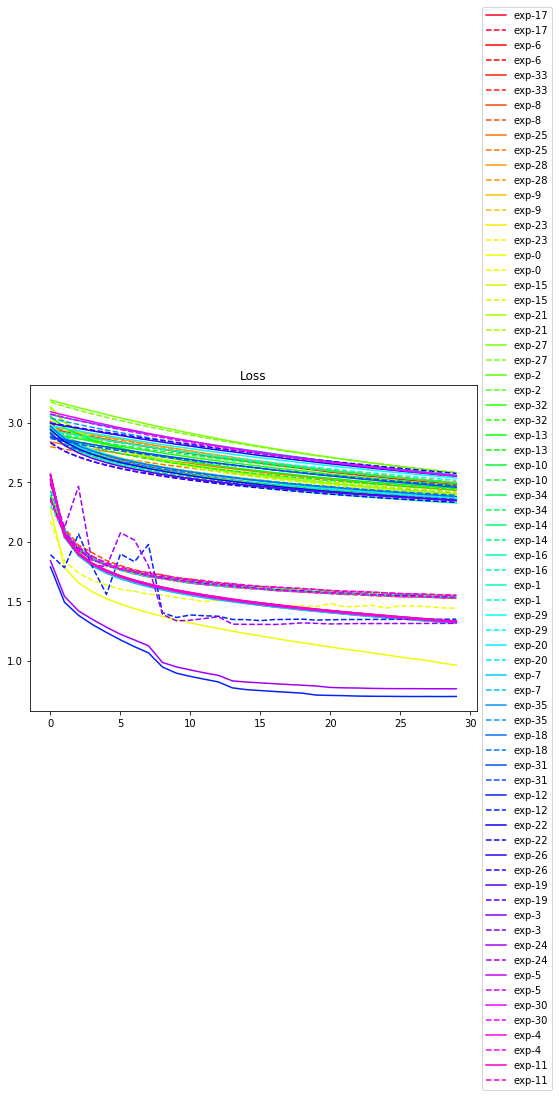

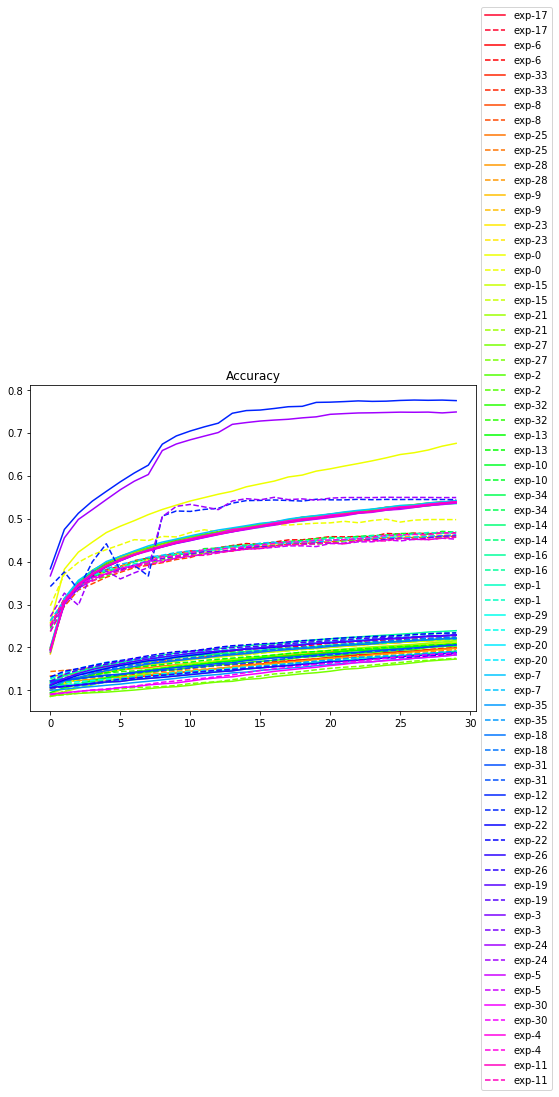

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()